# Convolutional Neural Networks (CNN)

## This is the inplmentation of CNN for Cifar10 data.

In [15]:
def CNN(train_X, train_y, test_X):
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
    from keras.callbacks import EarlyStopping
    from keras.layers.normalization import BatchNormalization
    from keras.preprocessing.image import ImageDataGenerator
    from keras.optimizers import SGD, RMSprop, Adam
    from keras import regularizers
    from sklearn.model_selection import train_test_split
    
    # train_X = train_X.astype('float32')
    # test_X = train_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    
    random_state = 42
    
    global history
    
    # Standardization
    mean = np.mean(train_X, axis=(0,1,2,3))
    std = np.std(train_X, axis=(0,1,2,3))
    train_X = (train_X - mean)/(std+1e-7)
    test_X = (test_X - mean)/(std+1e-7)
    
    train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=10000, random_state=random_state)
    
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                     input_shape=train_X.shape[1:]))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                        kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                        kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                        kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                        kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                        kernel_initializer='he_normal'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    datagen = ImageDataGenerator(
                                width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
                                height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                                rotation_range=15, # degree range for random rotations.
                                horizontal_flip=True, # randomly flip images
                                samplewise_center=False, # set each sample mean to 0
                                samplewise_std_normalization=False, # divide each input by its std
                                zca_whitening=False)  # apply ZCA whitening.
    
    datagen.fit(train_X)
    
    adam = Adam(lr=1.0e-4)
    opt1 = RMSprop(lr=0.0008, decay=1e-6)
    opt2 = RMSprop(lr=0.0003, decay=1e-6)
    
    #  early_stopping = EarlyStopping(patience=10, verbose=1)
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt1, metrics=['accuracy'])
    history = model.fit_generator(datagen.flow(train_X, train_y, batch_size=64),
                                     epochs=35,
                                     validation_data=(val_X, val_y),
                                     workers=4)
#                                      callbacks=[early_stopping])

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt2, metrics=['accuracy'])
    history = model.fit_generator(datagen.flow(train_X, train_y, batch_size=64),
                                     epochs=35,
                                     validation_data=(val_X, val_y),
                                     workers=4)

    pred_y = model.predict(test_X)
    pred_y = np.argmax(pred_y, 1)

    return pred_y

## Output f1 score

Epoch 1/35
625/625 [==============================] - 45s 71ms/step - loss: 1.9814 - acc: 0.4005 - val_loss: 1.9144 - val_acc: 0.4750
Epoch 2/35
625/625 [==============================] - 43s 69ms/step - loss: 1.3952 - acc: 0.5474 - val_loss: 1.1055 - val_acc: 0.6525
Epoch 3/35
625/625 [==============================] - 43s 69ms/step - loss: 1.1952 - acc: 0.6123 - val_loss: 0.9150 - val_acc: 0.7028
Epoch 4/35
625/625 [==============================] - 43s 69ms/step - loss: 1.0775 - acc: 0.6513 - val_loss: 0.8293 - val_acc: 0.7317
Epoch 5/35
625/625 [==============================] - 43s 69ms/step - loss: 1.0067 - acc: 0.6753 - val_loss: 0.8394 - val_acc: 0.7346
Epoch 6/35
625/625 [==============================] - 43s 69ms/step - loss: 0.9533 - acc: 0.6960 - val_loss: 0.7649 - val_acc: 0.7642
Epoch 7/35
625/625 [==============================] - 43s 69ms/step - loss: 0.9131 - acc: 0.7127 - val_loss: 0.7576 - val_acc: 0.7721
Epoch 8/35
625/625 [==============================] - 43s 69ms

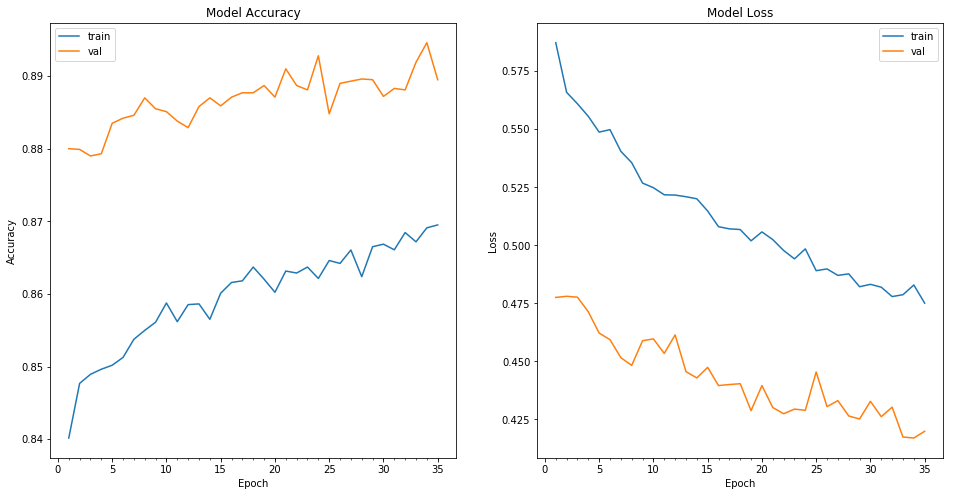

In [6]:
import numpy as np

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

random_state = 42

def load_cifar():
    (cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

    cifar_X = np.r_[cifar_X_1, cifar_X_2]
    cifar_y = np.r_[cifar_y_1, cifar_y_2]

    cifar_X = cifar_X.astype('float32') / 255
    cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

    train_X, test_X, train_y, test_y = train_test_split(cifar_X, cifar_y,
                                                        test_size=10000,
                                                        random_state=42)

    return (train_X, test_X, train_y, test_y)

def score():
    global test_X, test_y, pred_y
    global history
    train_X, test_X, train_y, test_y = load_cifar()
    pred_y = CNN(train_X, train_y, test_X)
    print(f1_score(np.argmax(test_y, 1), pred_y, average='macro'))
    
    % matplotlib inline
    import matplotlib.pyplot as plt
    # import seaborn

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(16, 8))

    # Summarize history for accuracy
    axs[0].plot(range(1,len(history.history['acc'])+1), history.history['acc'])
    axs[0].plot(range(1,len(history.history['val_acc'])+1), history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(history.history['acc'])+1), len(history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')

    # Summarize history for loss
    axs[1].plot(range(1,len(history.history['loss'])+1), history.history['loss'])
    axs[1].plot(range(1,len(history.history['val_loss'])+1), history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(history.history['loss'])+1), len(history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')

    # Show the plot
    plt.show()

if __name__ == '__main__':
    score()